In [2]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [3]:
dpii=200;

In [4]:
pylab.rcParams['figure.figsize'] = 14, 10

In [5]:
filename='ATA_data.csv'

In [6]:
df = pd.read_csv(filename)
df =df.drop('Unnamed: 0',1)

In [7]:
df.shape

(1636773, 25)

In [55]:
df.columns

Index([u'datetime', u'advertiser_bundle_id', u'creative_id', u'ad_id',
       u'app_id', u'bidadop_id', u'app_name', u'app_categories',
       u'publisher_name', u'device_idfa', u'os', u'osv', u'make', u'model',
       u'country', u'city', u'language', u'impression', u'clicked',
       u'installed', u'app_type', u'weekday', u'hours', u'week'],
      dtype='object')


#### Impressions to install bar plot with relation to the days in a week

In [59]:
df.groupby(['weekday', 'hours']).sum();

In [60]:
df_filter = df[['weekday', 'hours', 'app_type', 'os', 'country', 'impression', 'clicked', 'installed']]

In [61]:
grouped_w=df.groupby('weekday')['impression','installed'].sum()

In [62]:
days=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday', 'Saturday', 'Sunday']

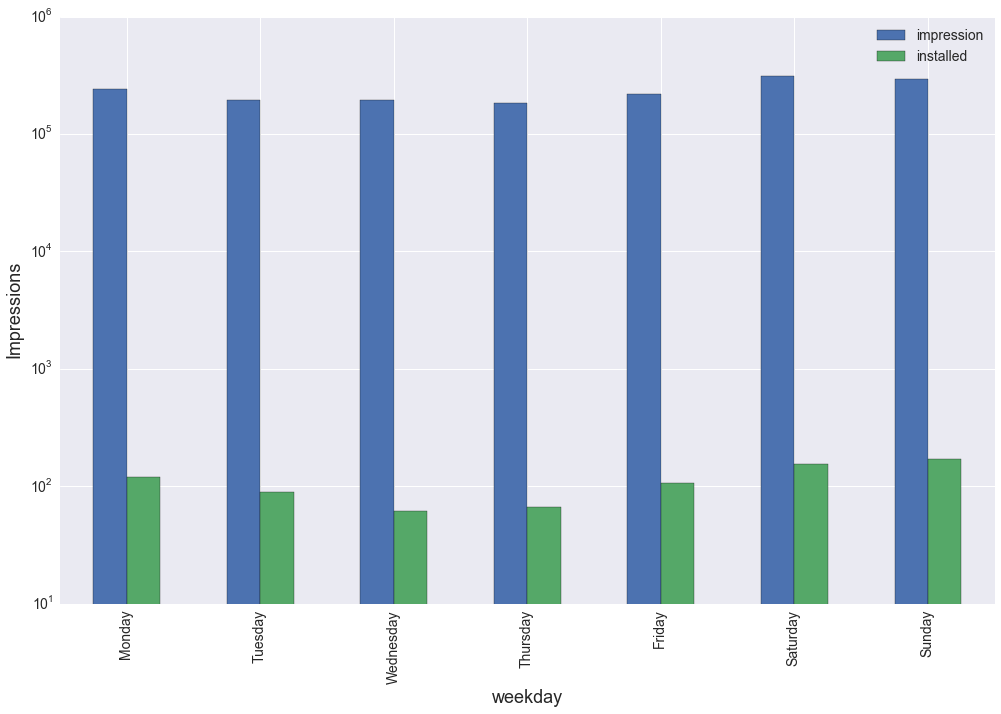

In [63]:
day_plot = grouped_w.plot(kind='bar', logy= True)
plt.xticks(grouped_w.index-1, days, rotation='vertical', fontsize = 14);
plt.yticks(fontsize = 14);
plt.ylabel('Installs', fontsize = 18);
plt.xlabel('weekday', fontsize = 18);
day_plot.set_ylabel('Impressions');
plt.legend(fontsize = 14, loc = 0);
plt.tight_layout()
plt.savefig('Impressions_Installs_Daily.png', dpi=dpii)

In [64]:
plt.legend?

In [65]:
grouped_wCI=df.groupby('weekday')['clicked','installed'].sum()

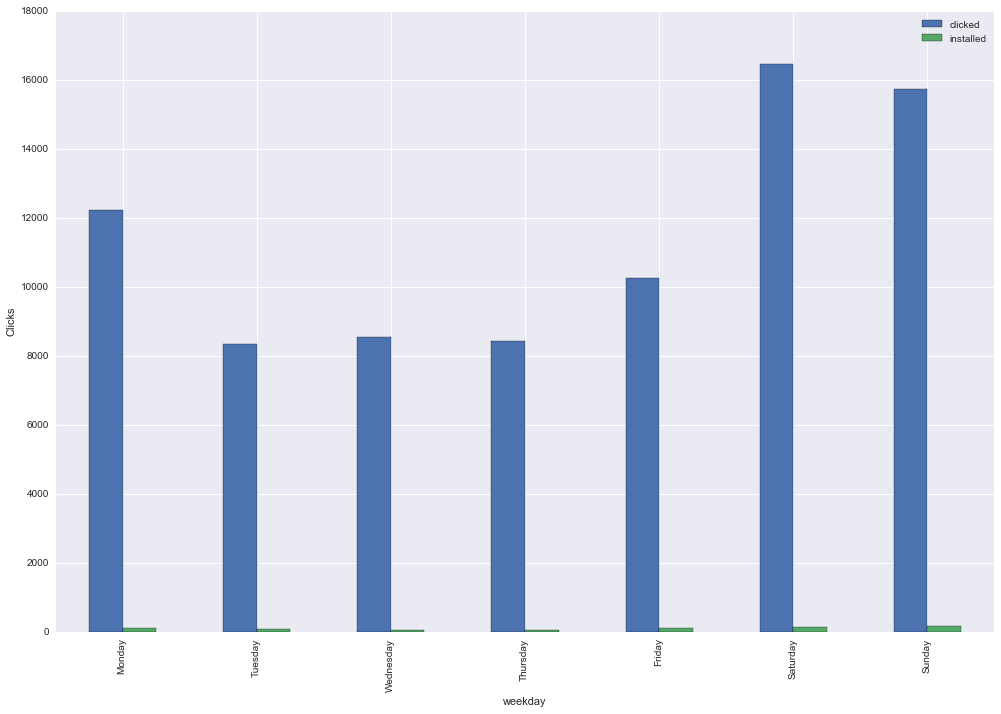

In [66]:
day_plot2 = grouped_wCI.plot(kind='bar')
plt.xticks(grouped_w.index-1, days, rotation='vertical');
plt.ylabel('Installs');
day_plot2.set_ylabel('Clicks');
plt.tight_layout()
plt.savefig('Click_Installs_Daily.png', dpi=dpii)

#### Install to impression bar plot comparison on a per hour basis

In [28]:
grouped_h=df.groupby('hours')['impression','installed'].sum()
grouped_hCI=df.groupby('hours')['clicked','installed'].sum()

In [29]:
df_LA=df[df['city'] == 'Los Angeles']

In [30]:
df_NY=df[df['city'] == 'New York']

In [31]:
dfdf=df[df['country'] == 'CAN']

In [32]:
dfdf.shape

(336567, 24)

In [33]:
grouped_LA=df_LA.groupby('hours')['impression','installed'].sum()
grouped_NY=df_NY.groupby('hours')['impression','installed'].sum()

In [86]:
grouped_LA

,impression,installed
hours,,
0,1136,2
1,1285,0
2,1119,2
3,1206,1
4,1219,0
5,1368,1
6,1086,0
7,562,0
8,383,0


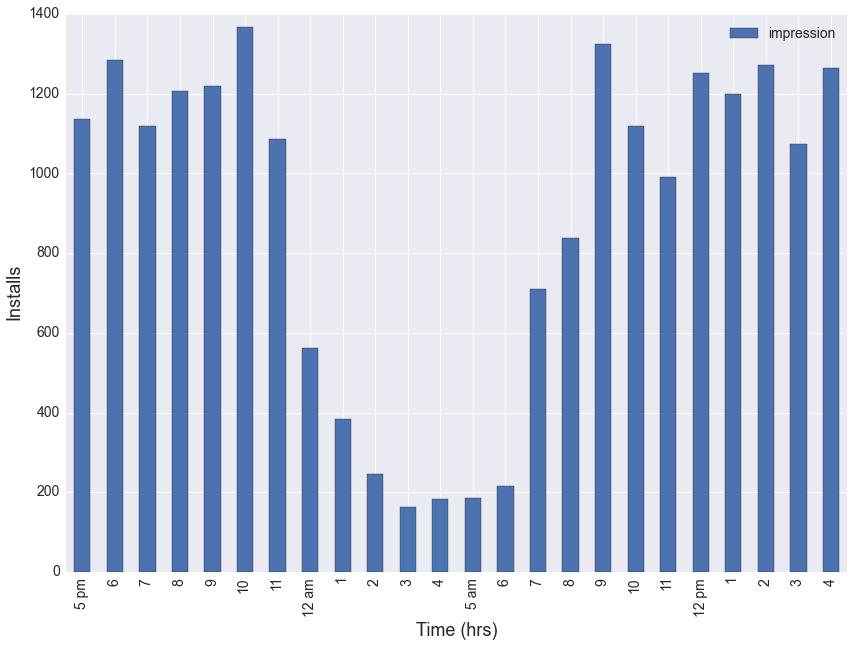

In [89]:
LA_plot = grouped_LA.drop('installed',1).plot(kind='bar')
plt.xticks(grouped_LA.index, hours, rotation='vertical', fontsize = 14);
plt.yticks(fontsize = 14);
LA_plot.set_ylabel('Impressions');
plt.ylabel('Installs', fontsize = 18);
plt.xlabel('Time (hrs)', fontsize = 18);
plt.legend(fontsize = 14);
plt.savefig('LA_Time.png', dpi=dpii)

#### NY_plot = grouped_NY.plot(kind='bar', secondary_y='installed')
plt.xticks(grouped_NY.index, hours, rotation='vertical');
plt.ylabel('Installs');
hr_plot.set_ylabel('Impressions');
#plt.tight_layout()
#plt.savefig('Impression_Installs_Hourly.png', dpi=dpii

In [ ]:
grouped_h['ratio']=grouped_h['installed']/grouped_h['impression']*100

In [34]:
hr_range=map(str, range(4,11 + 1))

In [35]:
hr_range

['4', '5', '6', '7', '8', '9', '10', '11']

In [36]:
hours=['5 pm'] + ['6', '7', '8', '9', '10', '11','12 am','1', '2', '3', '4'] + ['5 am'] + ['6', '7', '8', '9', '10', '11','12 pm','1', '2', '3', '4']

In [ ]:
hr_plot = grouped_h.drop('ratio',1).plot(kind='bar', secondary_y='installed')
plt.xticks(grouped_h.index, hours, rotation='vertical');
plt.ylabel('Installs');
hr_plot.set_ylabel('Impressions');
plt.tight_layout()
plt.savefig('Impression_Installs_Hourly.png', dpi=dpii)

In [ ]:
ratio_hr_plot = grouped_h['ratio'].plot(kind = 'bar')
ratio_hr_plot.set_ylabel('Ratio of Installs per Impression');
plt.tight_layout()
plt.savefig('Impressions_Installs_HourlyRatio.png', dpi=dpii)

In [ ]:
hr_plot2 = grouped_hCI.plot(kind='bar', secondary_y='installed')
plt.xticks(grouped_hCI.index, hours, rotation='vertical');
plt.ylabel('Installs');
hr_plot2.set_ylabel('Clicks');
plt.tight_layout()
plt.savefig('Click_Installs_Hourly.png', dpi=dpii)

In [ ]:
grouped_wh_Ins=df.groupby(['weekday', 'hours'])[['installed']].sum()

In [ ]:
grouped_wh_Ins.unstack().plot(kind='bar', legend=False)
plt.xticks(grouped_wh_Ins.unstack().index-1, days, rotation='vertical');
plt.ylabel('Installs');
plt.tight_layout()
plt.savefig('Installs_Daily_Summary.png', dpi=dpii)

In [ ]:
grouped_wh_Imp=df.groupby(['weekday', 'hours'])[['impression']].sum()

In [ ]:
grouped_wh_Imp.unstack().plot(kind='bar', legend=False)
plt.xticks(grouped_wh_Imp.unstack().index-1, days, rotation='vertical');
plt.ylabel('Impressions');
plt.tight_layout()
plt.savefig('Impressions_Daily_Summary.png', dpi=dpii)

In [ ]:
grouped_wh_C=df.groupby(['weekday', 'hours'])[['clicked']].sum()

In [ ]:
grouped_wh_C.unstack().plot(kind='bar', legend=False)
plt.xticks(grouped_wh_C.unstack().index-1, days, rotation='vertical');
plt.ylabel('Clicks');
plt.tight_layout()
plt.savefig('Clicks_Daily_Summary.png', dpi=dpii)

In [70]:
cols_to_keep=['weekday','hours','impression','installed','clicked', 'app_type']
mini_df=df[cols_to_keep]

In [ ]:
grouped_Imp_Ins_Daily=mini_df.groupby(['weekday', 'hours'])[['impression', 'installed']].sum().reset_index()

In [ ]:
grouped_Imp_Cli_Daily=mini_df.groupby(['weekday', 'hours'])[['impression', 'clicked']].sum().reset_index()

#### Categorical Inspection

In [1]:
grouped_cat_days=mini_df.groupby(['app_type', 'weekday'])[['impression', 'clicked', 'installed']].sum()

NameError: name 'mini_df' is not defined

In [72]:
grouped_cat_days=grouped_cat_days.reset_index()

In [73]:
grouped_cat=mini_df.groupby(['app_type'])[['impression', 'clicked', 'installed']].sum()

In [74]:
app_type_index=grouped_cat_days['app_type'].unique()

In [75]:
grouped_cat['ratio']=grouped_cat['installed']/grouped_cat['impression']

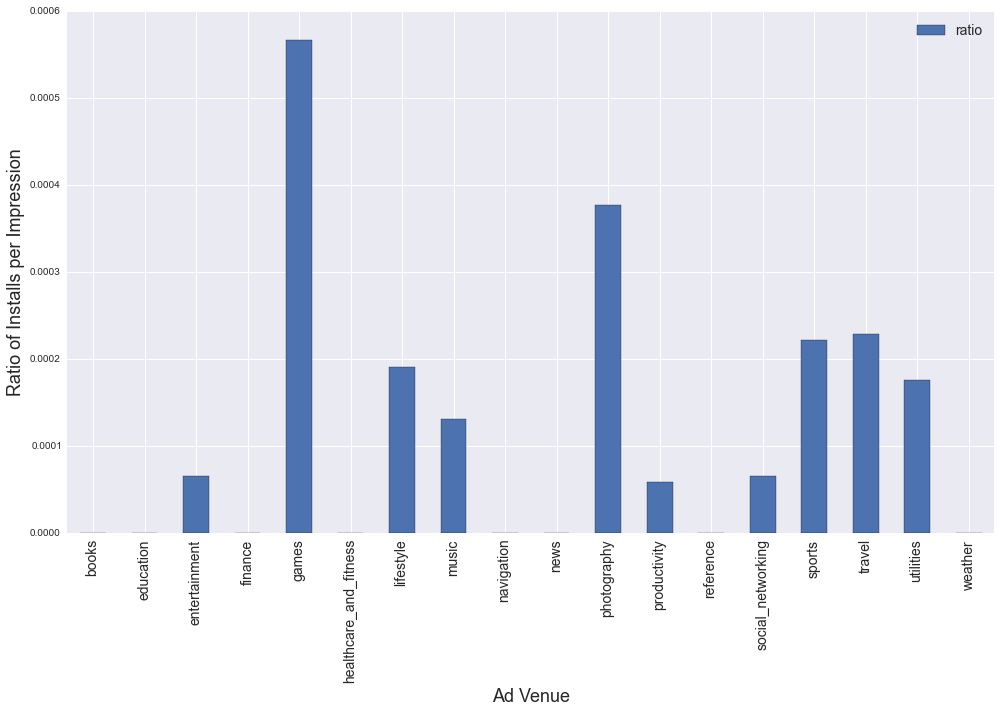

In [84]:
cat_plot = grouped_cat.drop(['clicked', 'installed', 'impression'],1).plot(kind='bar')
plt.xticks(range(0,len(app_type_index)), app_type_index, rotation='vertical', fontsize = 14);
plt.ylabel('Ratio of Installs per Impression', fontsize = 18);
plt.xlabel('Ad Venue',fontsize = 18)
plt.legend(fontsize = 14)
plt.tight_layout()
plt.savefig('Categorical_Feature_Exploration.png', dpi=dpii)

In [ ]:
grouped_cat_days['ratio']=grouped_cat_days['clicked']/grouped_cat_days['impression']

In [ ]:
grouped_cat_days.groupby('ratio').sum().reset_index();

In [ ]:
df[df['impression'] > 5].index

In [ ]:
df['impression']